# Visualize Training Results
## Chest X-ray Classification

Visualize training curves and evaluation metrics for individual experiments.

In [1]:
import sys
sys.path.append('..')

import json
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from IPython.display import Image as IPImage, display

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (14, 6)

## Select Experiment

In [2]:
# Choose experiment to visualize
experiment_id = 'exp01_densenet121_weighted_ce'  # Change this

checkpoint_dir = Path('../checkpoints') / experiment_id
print(f"Experiment: {experiment_id}")
print(f"Directory: {checkpoint_dir}")

Experiment: exp01_densenet121_weighted_ce
Directory: ../checkpoints/exp01_densenet121_weighted_ce


## 1. Training History

In [3]:
# Load checkpoint
checkpoint_path = checkpoint_dir / 'checkpoint_best.pth'
checkpoint = torch.load(checkpoint_path, map_location='cpu')

history = checkpoint['history']
best_epoch = checkpoint['best_epoch']
best_val_acc = checkpoint['best_val_acc']

print(f"Best Epoch: {best_epoch}")
print(f"Best Val Acc: {best_val_acc:.2f}%")

Best Epoch: 13
Best Val Acc: 91.88%


## 2. Training Curves

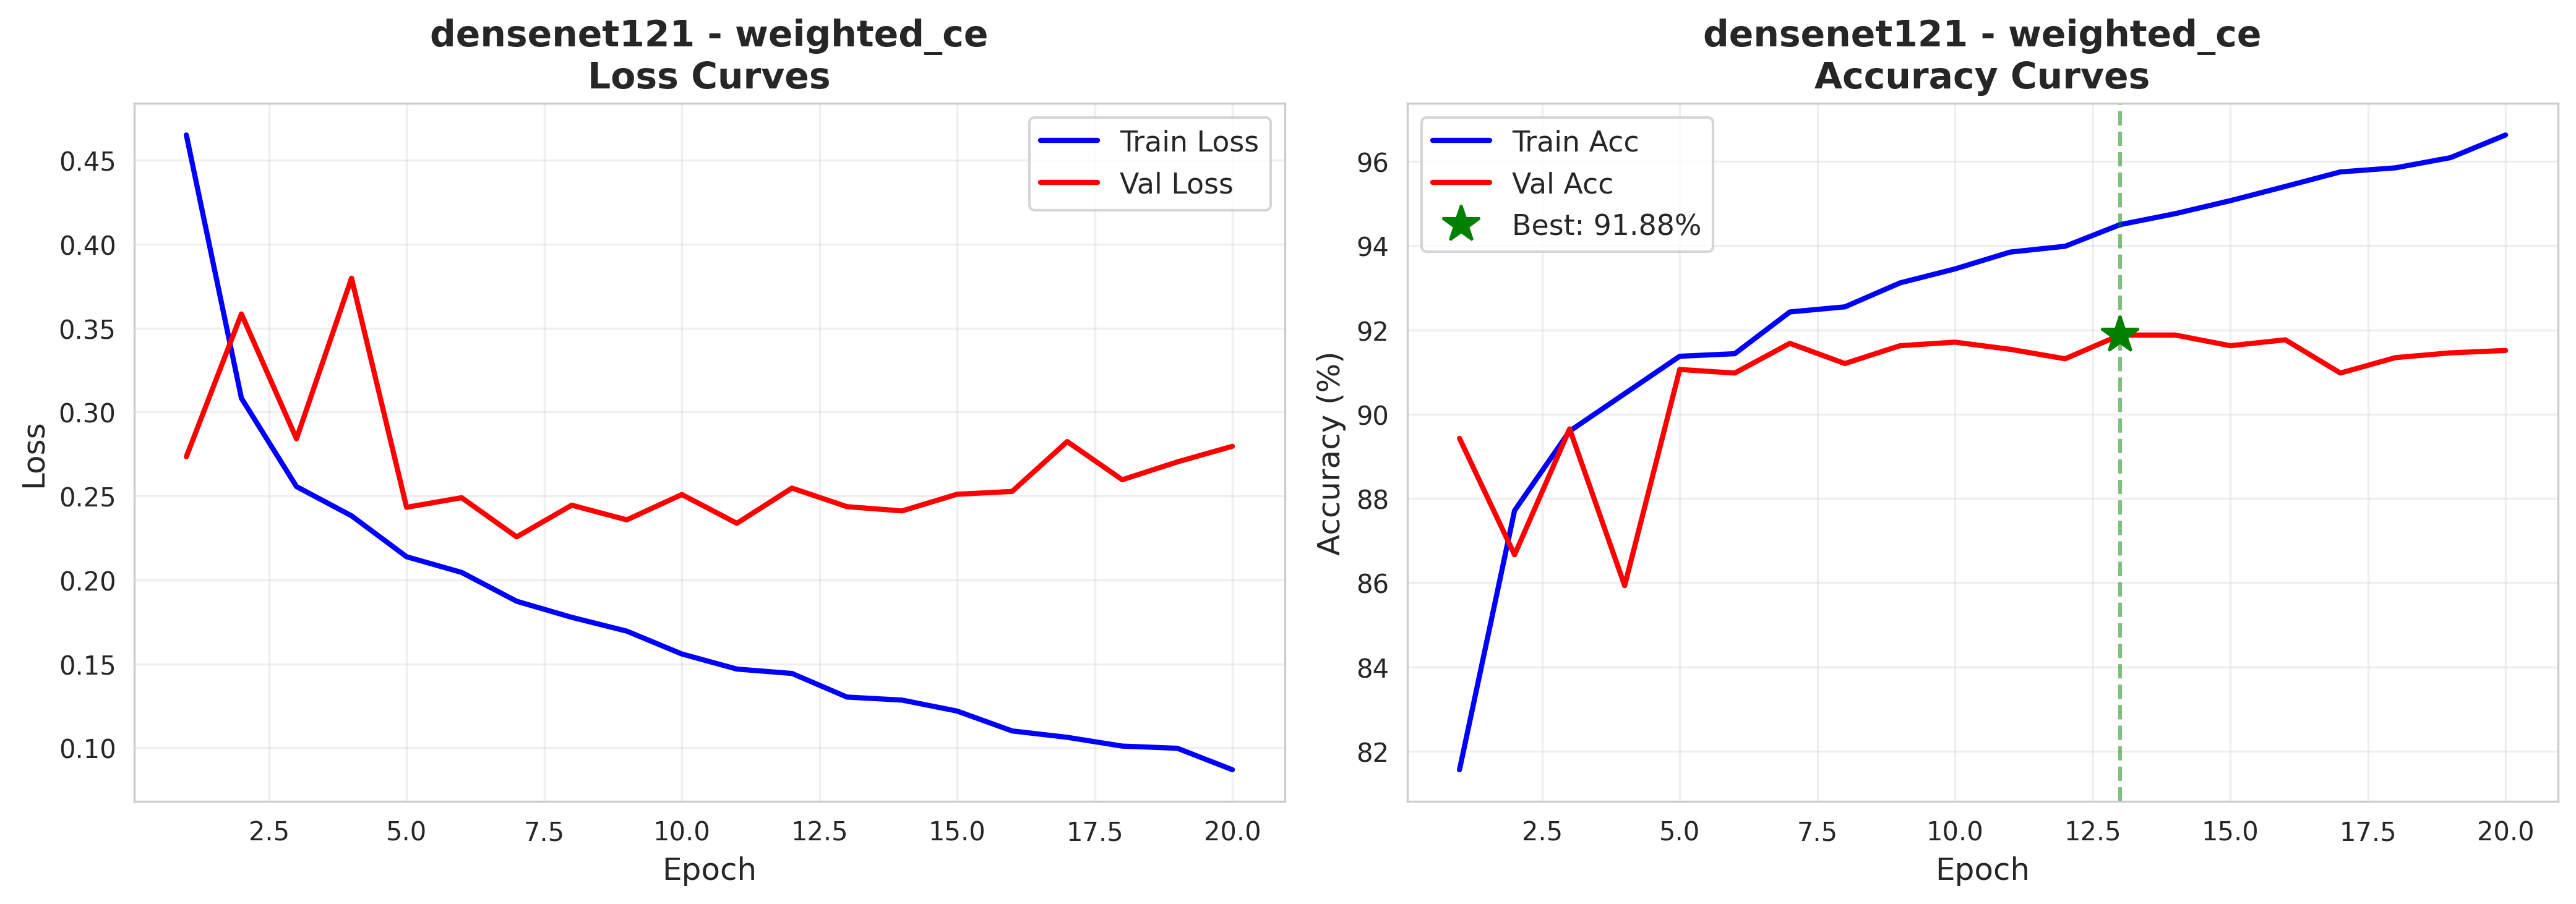

In [4]:
# Display saved training curves
curves_path = checkpoint_dir / 'training_curves.png'
if curves_path.exists():
    display(IPImage(filename=str(curves_path)))
else:
    print("Training curves not found!")

## 3. Evaluation Metrics

In [5]:
# Load evaluation metrics
metrics_path = checkpoint_dir / 'evaluation' / 'metrics_test.json'

if metrics_path.exists():
    with open(metrics_path, 'r') as f:
        metrics = json.load(f)
    
    print("Test Set Metrics:")
    print(f"  Accuracy:  {metrics['accuracy']*100:.2f}%")
    print(f"  Precision: {metrics['precision']*100:.2f}%")
    print(f"  Recall:    {metrics['recall']*100:.2f}%")
    print(f"  F1 Score:  {metrics['f1']*100:.2f}%")
    if metrics.get('auc'):
        print(f"  AUC:       {metrics['auc']*100:.2f}%")
else:
    print("Metrics not found! Run evaluation first.")

Test Set Metrics:
  Accuracy:  90.81%
  Precision: 90.34%
  Recall:    90.27%
  F1 Score:  90.31%
  AUC:       98.30%


## 4. Confusion Matrix

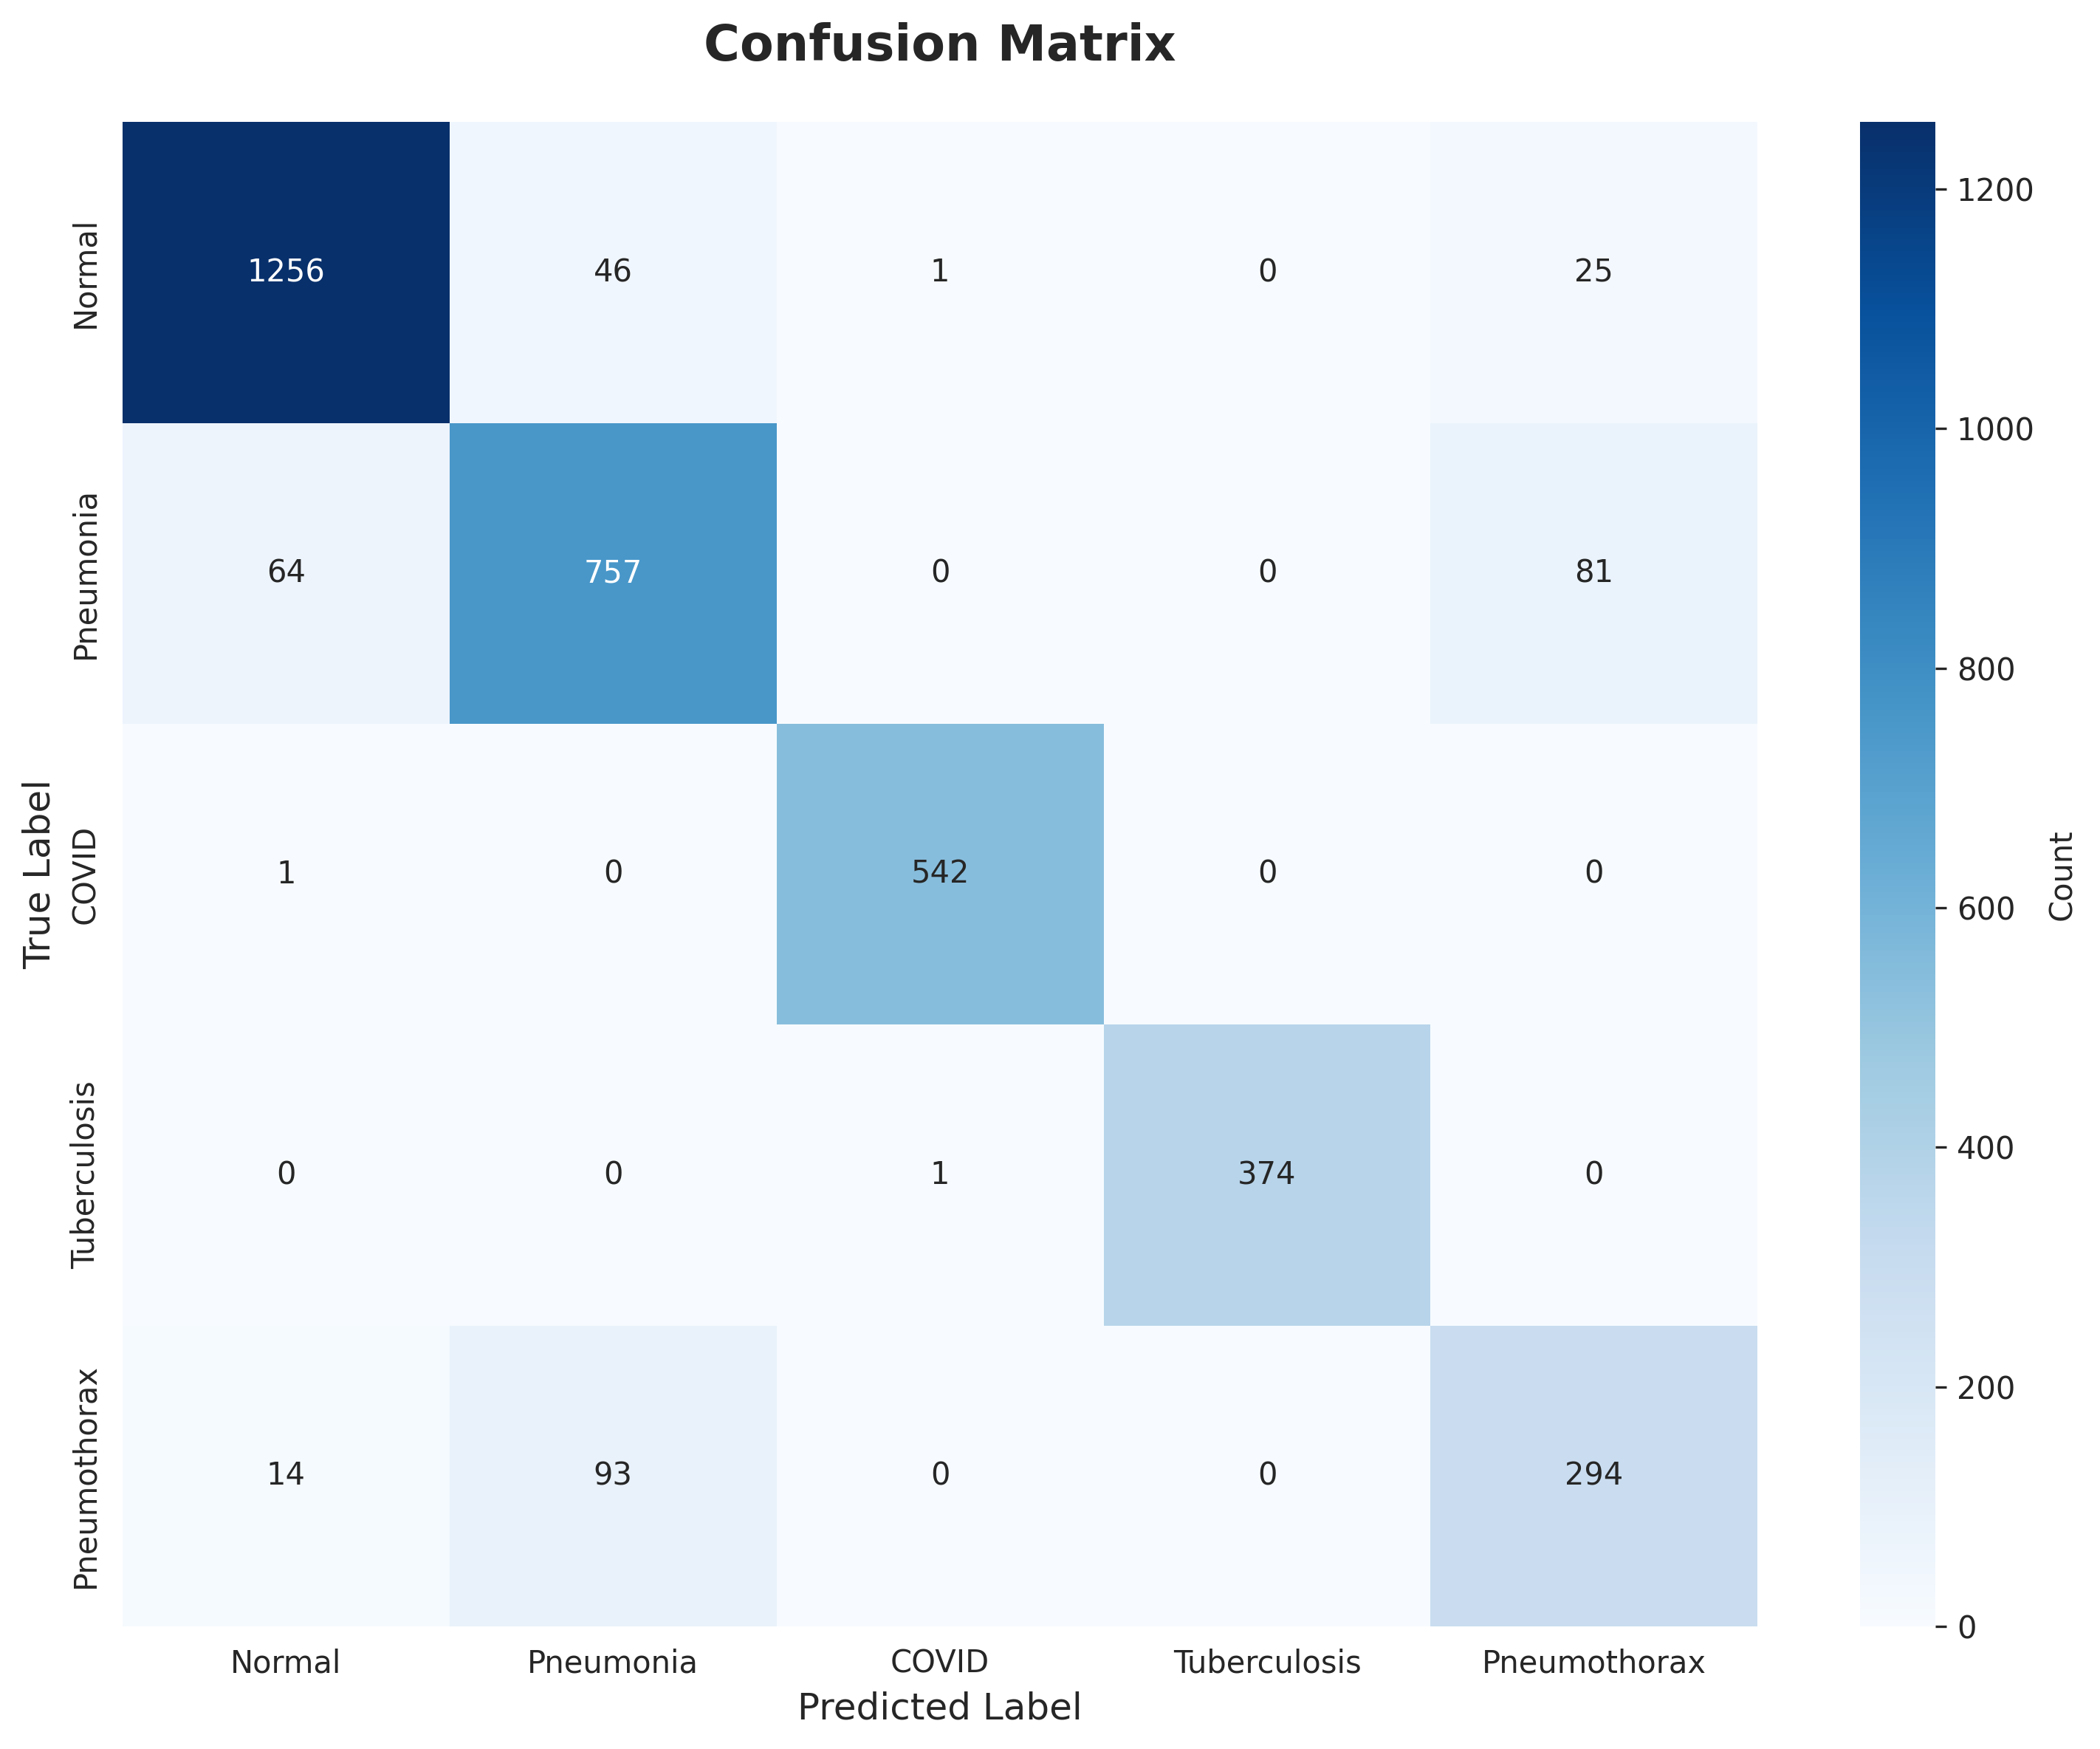

In [6]:
# Display confusion matrix
cm_path = checkpoint_dir / 'evaluation' / 'confusion_matrix_test.png'
if cm_path.exists():
    display(IPImage(filename=str(cm_path)))
else:
    print("Confusion matrix not found!")

## 5. ROC Curves

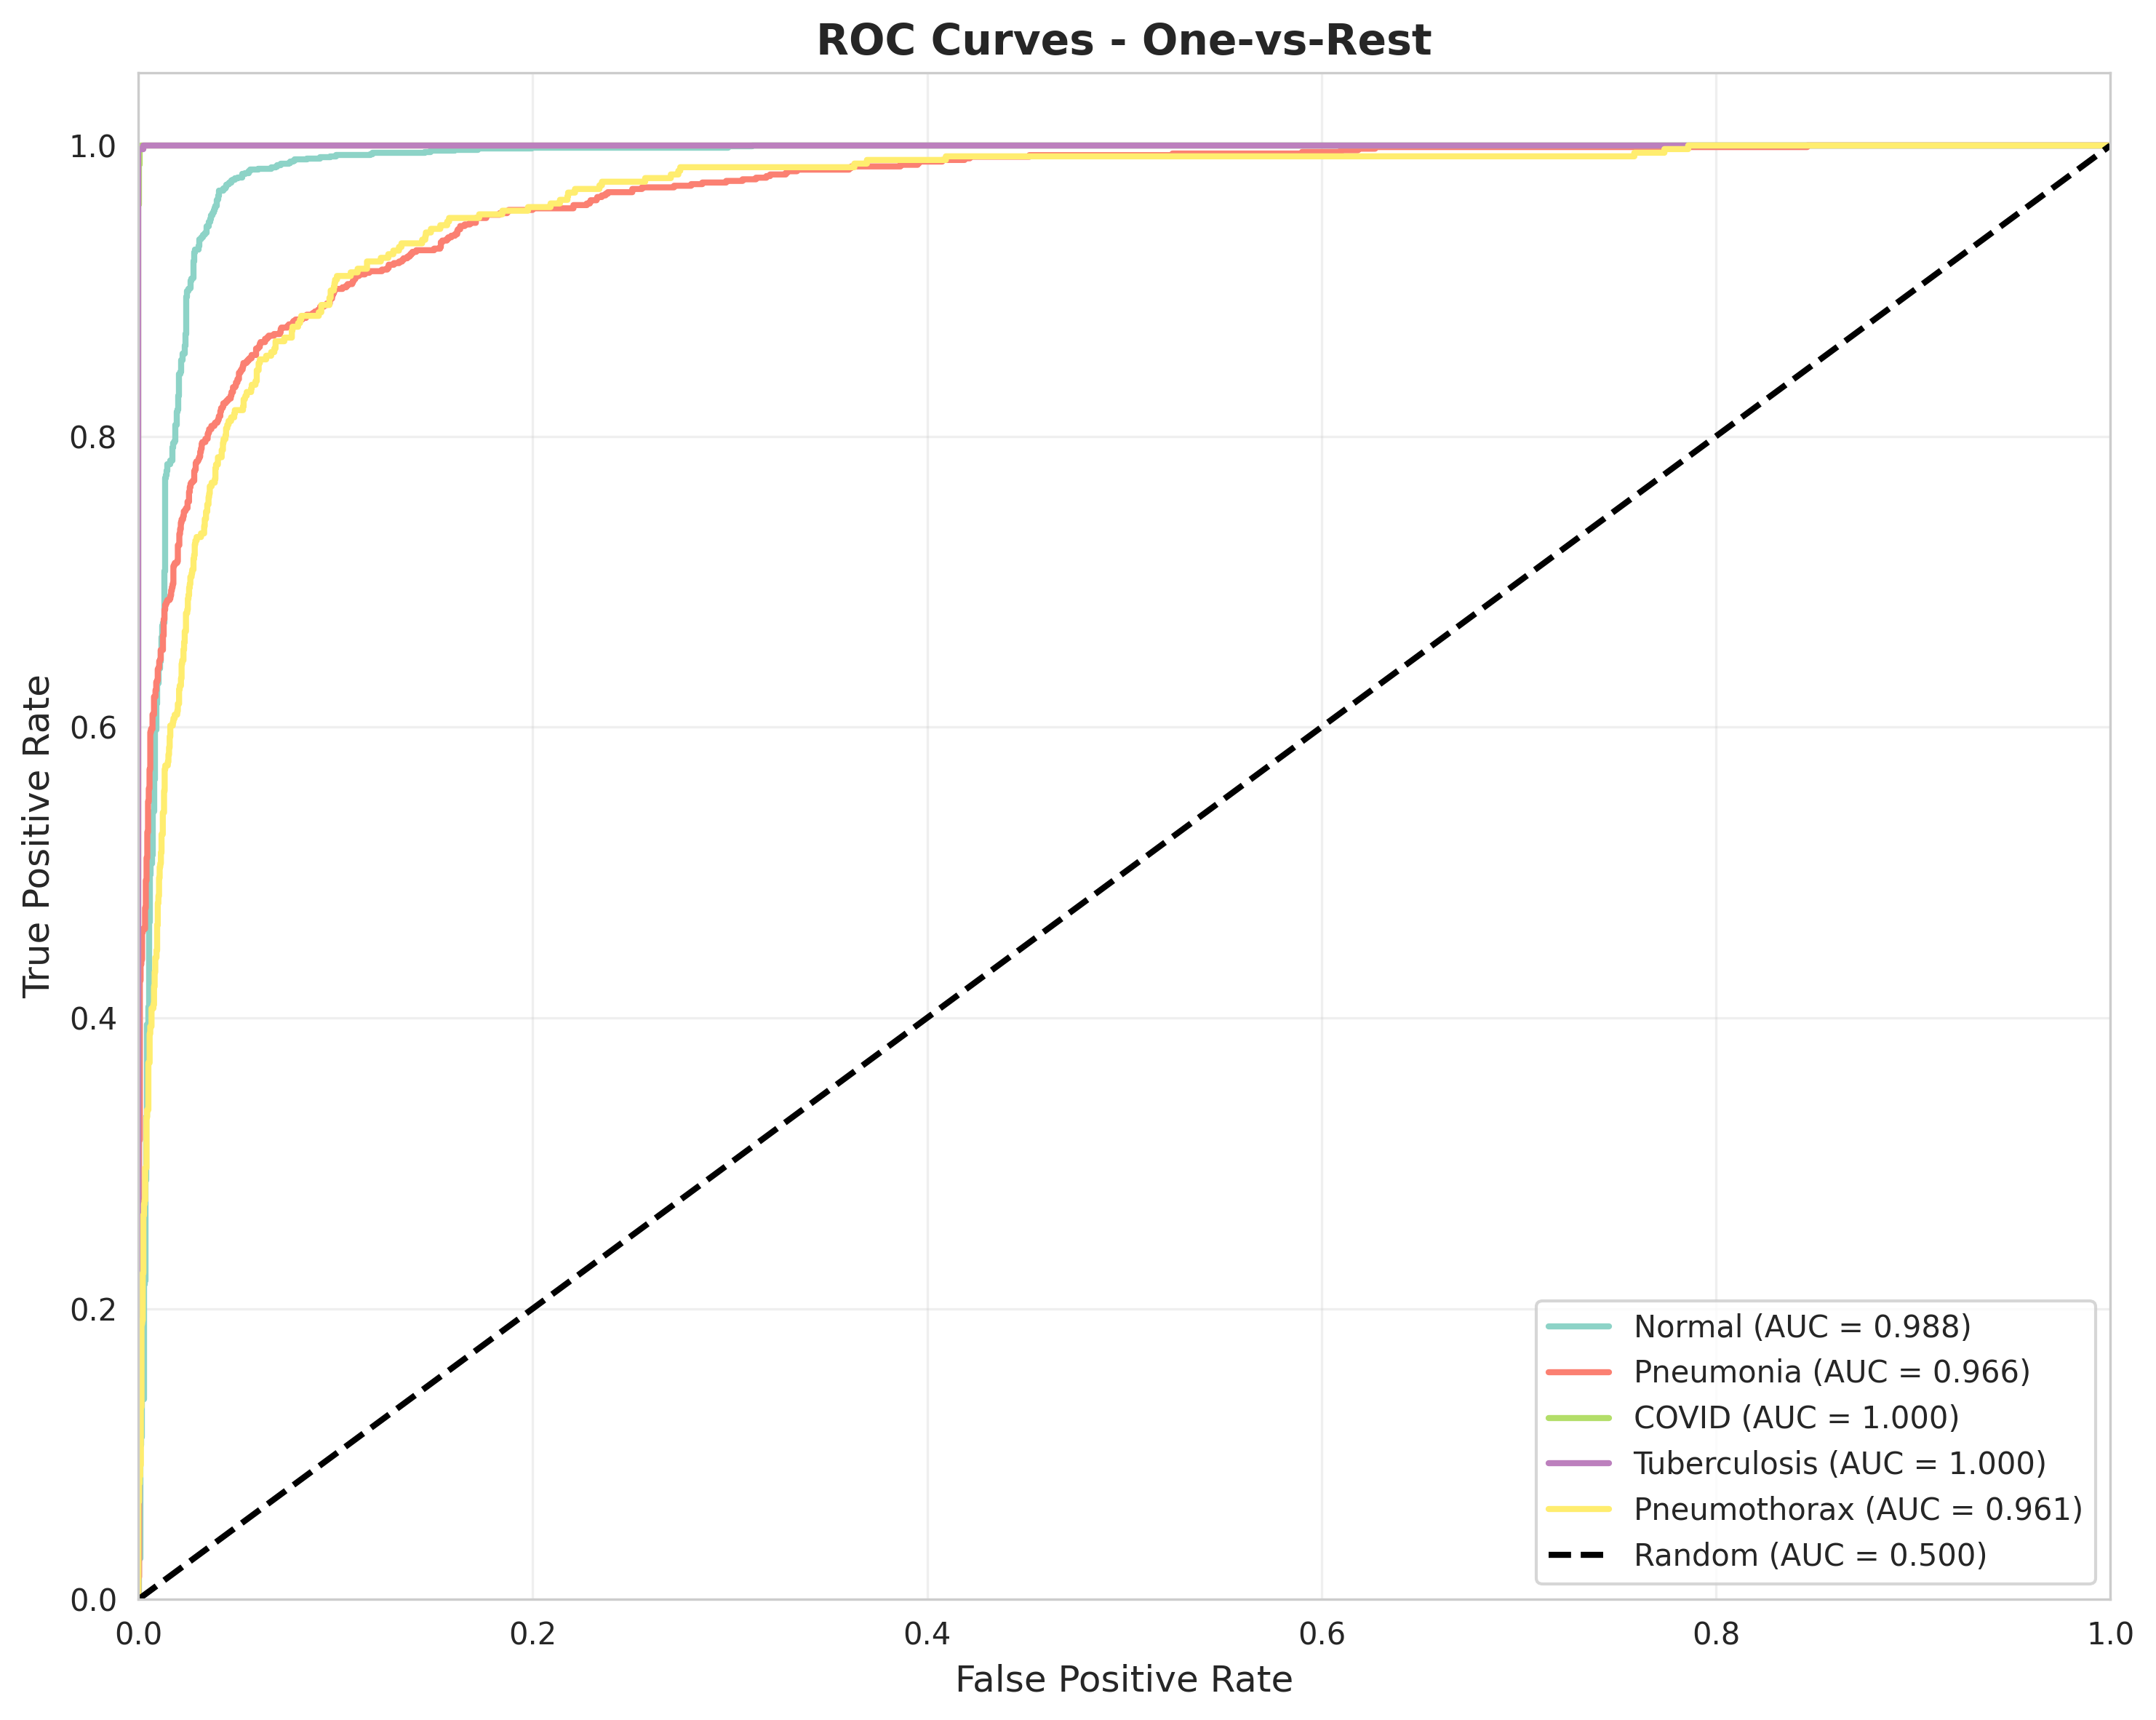

In [7]:
# Display ROC curves
roc_path = checkpoint_dir / 'evaluation' / 'roc_curves_test.png'
if roc_path.exists():
    display(IPImage(filename=str(roc_path)))
else:
    print("ROC curves not found!")

## 6. Per-Class Performance

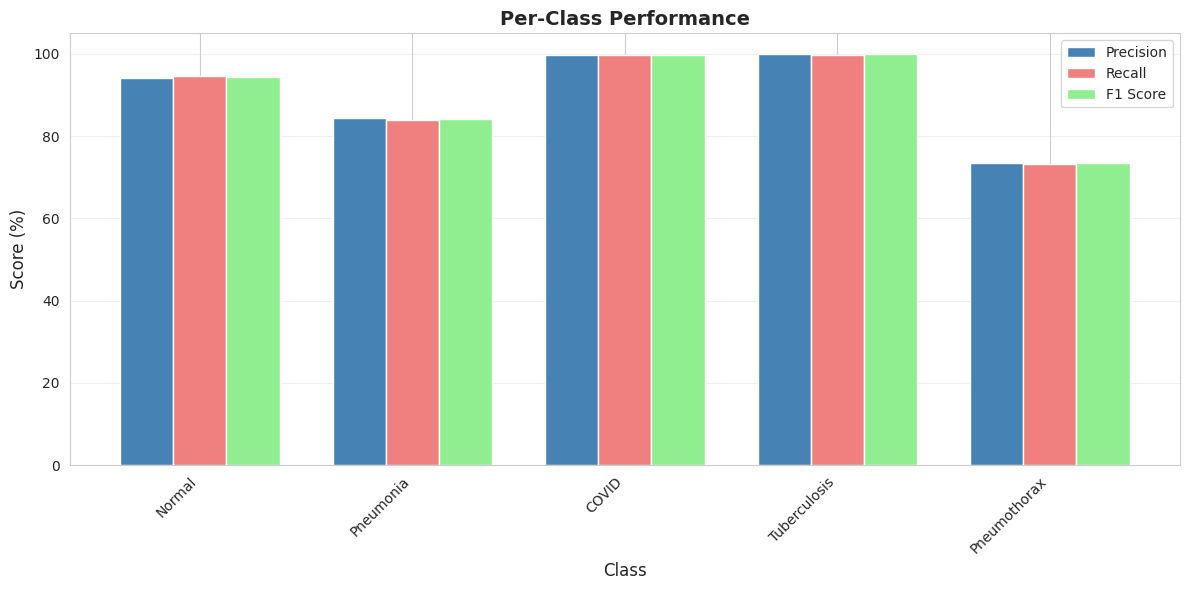

In [8]:
# Plot per-class metrics
if metrics_path.exists():
    classes = ['Normal', 'Pneumonia', 'COVID', 'Tuberculosis', 'Pneumothorax']
    
    precision = [p * 100 for p in metrics['precision_per_class']]
    recall = [r * 100 for r in metrics['recall_per_class']]
    f1 = [f * 100 for f in metrics['f1_per_class']]
    
    x = np.arange(len(classes))
    width = 0.25
    
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.bar(x - width, precision, width, label='Precision', color='steelblue')
    ax.bar(x, recall, width, label='Recall', color='lightcoral')
    ax.bar(x + width, f1, width, label='F1 Score', color='lightgreen')
    
    ax.set_xlabel('Class', fontsize=12)
    ax.set_ylabel('Score (%)', fontsize=12)
    ax.set_title('Per-Class Performance', fontsize=14, fontweight='bold')
    ax.set_xticks(x)
    ax.set_xticklabels(classes, rotation=45, ha='right')
    ax.legend()
    ax.grid(True, alpha=0.3, axis='y')
    plt.tight_layout()
    plt.show()